In [122]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
import random
import warnings
import scipy.stats as stats
import scipy.stats.distributions as dist
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

In [2]:
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
from scipy.stats import uniform

In [4]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs (size = n, loc = start, scale = width)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

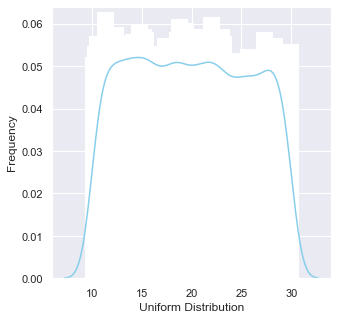

In [5]:
ax = sns.distplot (data_uniform, bins = 100, kde = True,
                 color ='skyblue',
                 hist_kws = {"linewidth": 15, 'alpha':1})
ax.set (xlabel ='Uniform Distribution', ylabel ='Frequency')

# Distribusi Normal

In [6]:
from scipy.stats import norm
data_normal = norm.rvs (size = 10000, loc =0, scale =1)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

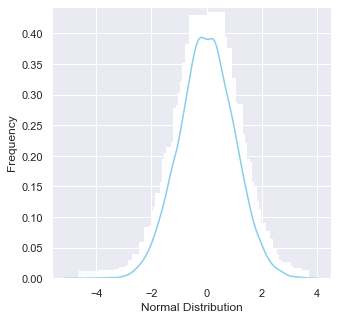

In [7]:
ax = sns.distplot (data_normal,
                  bins = 100,
                  kde = True,
                  color ='skyblue',
                  hist_kws ={"linewidth": 15, 'alpha':1})
ax.set (xlabel ='Normal Distribution', ylabel ='Frequency')

In [8]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a =5, size =10000)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

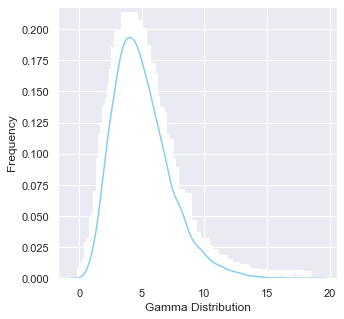

In [9]:
ax = sns.distplot (data_gamma, kde = True, bins = 100, color ='skyblue',
                   hist_kws ={"linewidth": 15, 'alpha':1})
ax.set (xlabel ='Gamma Distribution', ylabel ='Frequency')

# Exponential Distribution

In [10]:
from scipy.stats import expon
data_expon = expon.rvs(scale = 1, loc =0, size = 1000)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

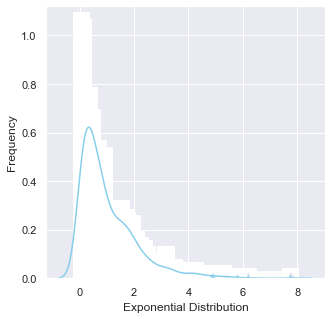

In [11]:
ax = sns.distplot (data_expon,
                  kde = True,
                  bins = 100,
                  color ='skyblue',
                  hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel = 'Exponential Distribution', ylabel = 'Frequency')

In [12]:
from scipy.stats import poisson
data_poisson = poisson.rvs (mu=3, size = 10000)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

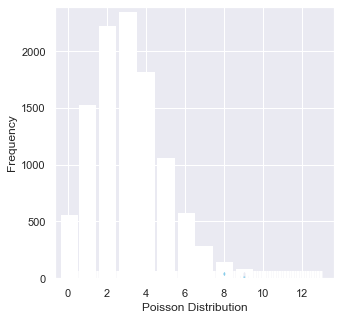

In [13]:
ax = sns.distplot (data_poisson,
                  kde = False,
                  bins = 100,
                  color ='skyblue',
                  hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel = 'Poisson Distribution', ylabel = 'Frequency')

# Binomial Distribution

In [14]:
from scipy.stats import binom
data_binom = binom.rvs (n=10, p=0.8, size =10000)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

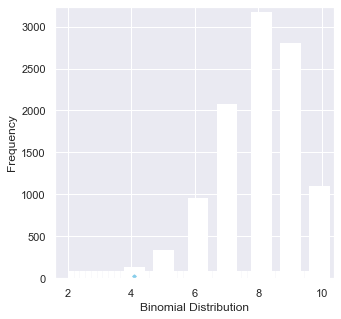

In [15]:
ax = sns.distplot (data_binom,
                  kde = False,
                  color ='skyblue',
                  hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel = 'Binomial Distribution', ylabel = 'Frequency')

# Bernoulli Distribution

In [16]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs (size =10000, p=0.6)

[Text(0.5, 0, 'Bernounlli Distribution'), Text(0, 0.5, 'Frequency')]

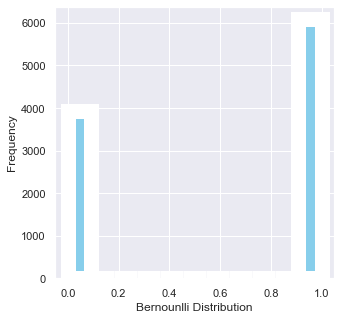

In [17]:
ax = sns.distplot (data_bern,
                  kde = False,
                  
                  color ='skyblue',
                  hist_kws={"linewidth":15, 'alpha':1})
ax.set(xlabel = 'Bernounlli Distribution', ylabel = 'Frequency')

# Confince Intervals

# CI for Proporsi Populasi

In [18]:
df = pd.read_csv('Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
df['Sex1'] =df.sex.replace ({1:"Male", 0:"Female"})

In [20]:
dx =df[["target", "Sex1"]].dropna()
dx

,target,Sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female
...,...,...
1020,1,Male
1021,0,Male
1022,0,Male
1023,1,Female


In [21]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [22]:
p_fm = 226/(86+226)
p_fm

0.7243589743589743

In [23]:
n = 86+226
n

312

In [24]:
se_female = np.sqrt (p_fm * (1-p_fm)/n)
se_female

0.02529714756803247

In [25]:
z_score = 1.96
lcb = p_fm - z_score * se_female
ucb = p_fm + z_score * se_female
lcb, ucb

(0.6747765651256307, 0.773941383592318)

In [26]:
sm.stats.proportion_confint (n* p_fm, n)

(0.6747774762140357, 0.773940472503913)

# calculation of CI

In [27]:
df.groupby ("Sex1").agg ({"chol":[np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [28]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96

In [29]:
se = sd / np.sqrt (n)
se

3.6459320499455985

In [30]:
lcb = mean_fe - z * se
ucb = mean_fe + z *se
lcb, ucb

(254.3039731821066, 268.59602681789335)

In [31]:
# contoh lain Confidence Interval (CI)

sns.set (rc = {'figure.figsize': (13,7.5)})
sns.set_context('talk')

In [32]:
#Mengenerate data Berat Badan dalam Poun
np.random.seed (42)
normal_distribution_us_male_mass_pounds = np.random.normal (loc=181, scale=24, size = 6000)
normal_distribution_us_female_mass_pounds = np.random.normal (loc=132, scale=22, size = 6500)
all_mass_values = np.concatenate ((normal_distribution_us_male_mass_pounds, 
                                 normal_distribution_us_female_mass_pounds),axis = 0)
df_ppl_mass = pd.DataFrame (data={'us_people_mass_pounds': all_mass_values})
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Mass of People in U.S')

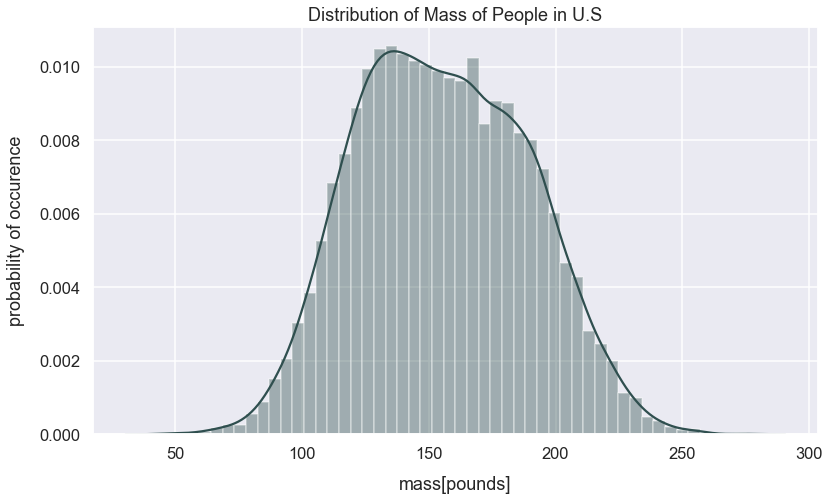

In [33]:
sns.distplot (df_ppl_mass['us_people_mass_pounds'],
             color ="darkslategrey")
plt.xlabel ("mass[pounds]", labelpad = 14)
plt.ylabel ("probability of occurence", labelpad = 14)
plt.title ("Distribution of Mass of People in U.S")

In [34]:
# populasi mean
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

In [35]:
#populasi STD
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

In [36]:
sample_means =[]
n = 25
for sample in range (0, 300):
    sample_values = np.random.choice (a=df_ppl_mass['us_people_mass_pounds'],
                                     size = n)
    sample_mean = np.mean (sample_values)
    sample_means.append(sample_mean)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.015, "Distribution of Sample Means ($n=25$) of People's Mass in Pounds")

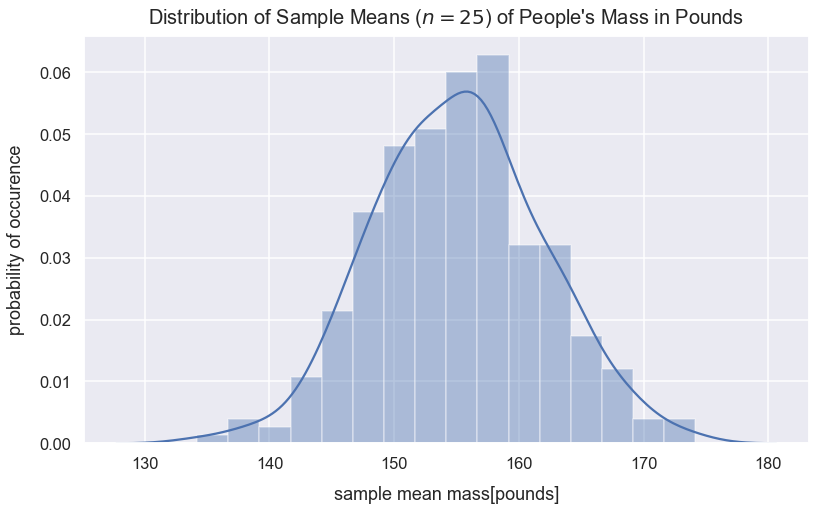

In [37]:
sns.distplot (sample_means)
plt.xlabel ("sample mean mass[pounds]", labelpad = 14)
plt.ylabel ("probability of occurence", labelpad = 14)
plt.title ("Distribution of Sample Means ($n=25$) of People's Mass in Pounds",
           y=1.015, fontsize = 20)


In [38]:
#median dari sample means
median_of_sample_means = np.median (sample_means)
median_of_sample_means

155.3008268518431

In [39]:
#mean dari sample mean
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [40]:
pop_mean_mass

155.4232805942338

In [41]:
#STD dari sample means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

In [42]:
#Equation for standar deviasi of sampling distribution
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791725

In [43]:
std_dev_of_sample_means

6.734407481483423

In [44]:
#Critical Z-scores
tail = 1 -stats.norm.cdf(1.96)
tail

0.024997895148220484

In [45]:
#the area under curve antara z-critical scores is +-0.95
1-(tail*2)

0.950004209703559

In [46]:
lower_95_perc_bound = mean_of_sample_means -1.96*standard_error
lower_95_perc_bound

141.95878847542738

In [47]:
upper_95_perc_bound = mean_of_sample_means +1.96*standard_error
upper_95_perc_bound

168.28957812845093

Text(0, 0.5, 'frequency of occurance')

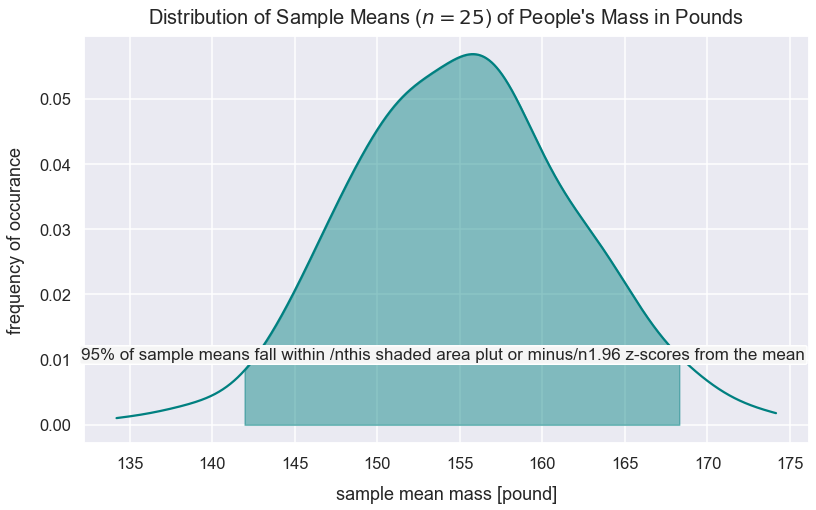

In [48]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace (np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color ='teal')
shade = np.linspace (lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha =0.45, color ='teal')
plt.text(x=154, y=.01, horizontalalignment ='center', fontsize=17,
        s="95% of sample means fall within /nthis shaded area plut or minus/n1.96 z-scores from the mean",
        bbox=dict(facecolor ='whitesmoke', boxstyle ="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds",
         y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pound]", labelpad=14)
plt.ylabel("frequency of occurance", labelpad=14)

# Hypothesis Testing

In [49]:
n = 1018
pnull =.52
phat =.56

In [50]:
sm.stats.proportions_ztest(phat*n,n,pnull, alternative ='larger')

(2.571067795759113, 0.005069273865860533)

In [51]:
url ="https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"
da=pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [52]:
females = da[da["RIAGENDR"]==2]
male = da[da["RIAGENDR"]==1]

In [53]:
n1=len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females ["BMXBMI"].std()
(n1,mu1,sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [54]:
n2=len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male ["BMXBMI"].std()
(n2,mu2,sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [55]:
sm.stats.ztest(females["BMXBMI"].dropna(),
male["BMXBMI"].dropna(),alternative ='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

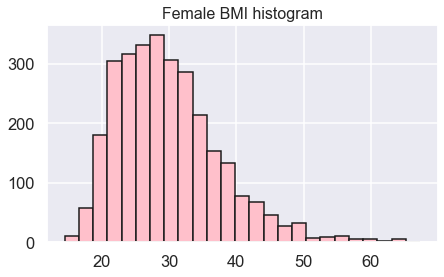

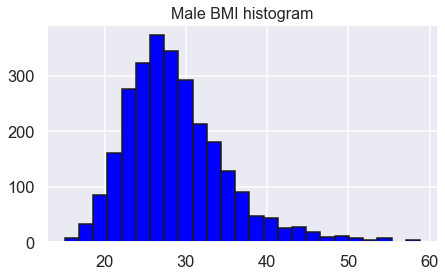

In [56]:
#Kesimpulan dari Test Hypotesis
plt.figure(figsize =(7,4))
plt.title("Female BMI histogram", fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor ='k',
        color='pink', bins=25)
plt.show()

plt.figure(figsize =(7,4))
plt.title("Male BMI histogram", fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor ='k',
        color='blue', bins=25)
plt.show()

# Hypothesis Testing for One Proportion

In [57]:
df =pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [58]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [59]:
len (df)

1025

In [64]:
len(df[df['target'] ==1])

526

In [67]:
x =len(df[df['target'] == 1])
x

526

In [62]:
dt =df["target"].value_counts()
dt

1    526
0    499
Name: target, dtype: int64

In [70]:
#H0:p0 =0.42
#Ha:p> 0.42

In [65]:
p_us = len(df[df['target'] ==1])/len(df)
p_us

0.5131707317073171

In [68]:
se=np.sqrt(0.42*(1-0.42)/len(df))
se

0.015416177755376521

In [69]:
be =p_us
he =0.42
test_stat = (be-he)/se
test_stat

6.04369858636477

In [77]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue
#karena pvalue kecil, sehingga terdapat perbedaan yg signifikasn dari proporti penderita jantung us & irlandia

1.5062078087269162e-09

# Hypotesis Statistik test Cheat

In [79]:
#shapiro-Wilk Test
data = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
stat, p =shapiro(data)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably Gaussian')
else:
    print ('Probably not Gaussian')

stat=0.895,p=0.193
Probably Gaussian


In [81]:
#D'Agostino K^2 Test
data = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
stat, p =normaltest(data)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably Gaussian')
else:
    print ('Probably not Gaussian')


stat=3.392,p=0.183
Probably Gaussian


C:\Users\Owner\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [89]:
#Anderson-Darling Test
data = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
result =anderson(data)
print ('stat=%.3f' %(result.statistic))
for i in range (len(result.critical_values)):
    sl,cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print ('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print ('Probably not gaussian at the %.1f%% level' % (sl))


stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [92]:
#correlation Tests
#Pearson
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =pearsonr(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably Independent')
else:
    print ('Probably dependent')


stat=0.688,p=0.028
Probably dependent


In [94]:
# Spearman's Rank Correlation
#correlation Tests
#Pearson
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =spearmanr(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably Independent')
else:
    print ('Probably dependent')


stat=0.855,p=0.002
Probably dependent


In [96]:
#Kendall's Rank Correlation
#correlation Tests
#Pearson
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =kendalltau(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably Independent')
else:
    print ('Probably dependent')


stat=0.733,p=0.002
Probably dependent


In [100]:
#Chi-Squared Test

table =[[10,20,30],[6,9,17]]
stat, p, dof, expected = chi2_contingency(table)
print ('stat =%.3f, p=%.3f' % (stat,p))
if p>0.05:
    print ('Probably Independent')
else:
    print ('Probably dependent')

stat =0.272, p=0.873
Probably Independent


In [103]:
#stationary Test
#augmented Dickey-Fuller Unit Root Test
data = [0,1,2,3,4,5,6,7,8,9]
stat, p, lags, obs, crit, t = adfuller(data)
print ('stat =%.3f, p=%.3f' % (stat,p))
if p>0.05:
    print ('Probably not Stationary')
else:
    print ('Probably stationary')

stat =0.992, p=0.994
Probably not Stationary


In [106]:
#Kwiatkowski-Phillips-Schmidt-Shin
data = [0,1,2,3,4,5,6,7,8,9]
stat, p, lags, crit = kpss(data)
print ('stat =%.3f, p=%.3f' % (stat,p))
if p>0.05:
    print ('Probably not Stationary')
else:
    print ('Probably stationary')

stat =0.410, p=0.073
Probably not Stationary


# parametric statistical Hypothesis Test

In [108]:
#t-test
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =ttest_ind(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')


stat=0.515,p=0.613
Probably the same distribution


In [112]:
#paired t-test
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =ttest_rel(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')


stat=0.741,p=0.478
Probably the same distribution


# Analisis Variance Test (ANOVA)

In [114]:
#paired t-test
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
data3 = [-.208,0.696,0.928,-1.148,-0.213,0.229,0.137,0.269,-0.870,-1.204]
stat, p =f_oneway(data1, data2, data3)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')


stat=0.363,p=0.699
Probably the same distribution


# Nonparametric Statistical Hypotesis Test

In [117]:
#Mann-Whitney U Test

data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =mannwhitneyu(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')


stat=45.000,p=0.367
Probably the same distribution


In [119]:
#Wilcoxon Signed-Rank Test

data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =wilcoxon(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')


stat=21.000,p=0.557
Probably the same distribution


In [121]:
#Krukal-Wallis H Test


data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
stat, p =kruskal(data1, data2)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')


stat=0.143,p=0.705
Probably the same distribution


In [123]:
#Friendman Test

#paired t-test
data1 = [0.873,2.817,0.121,-0.945,-0.055,-1.436,0.360,-1.478,-1.637,-1.869]
data2 = [0.353,3.517,0.125,-7.545,-0.555,-1.536,3.350,-1.578,-3.537,-1.579]
data3 = [-.208,0.696,0.928,-1.148,-0.213,0.229,0.137,0.269,-0.870,-1.204]
stat, p =friedmanchisquare(data1, data2, data3)
print ('stat=%.3f,p=%.3f' %(stat, p))
if p>0.05:
    print ('Probably the same distribution')
else:
    print ('Probably different distribution')



stat=1.400,p=0.497
Probably the same distribution
